<a href="https://colab.research.google.com/github/UlrikeDetective/Data-Science-For-Beginners/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
%cd /content/drive/My Drive/Data Analytics


/content/drive/My Drive/Data Analytics


In [8]:
import pandas as pd

df = pd.read_csv('diabetes.tsv', sep='\t')


In [9]:
import numpy as np

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [10]:
# Compute mean values for all columns
mean_values = df.mean()

# Compute variance for all columns
variance_values = df.var()

# Print mean values
print("Mean values:")
print(mean_values)

# Print variance values
print("\nVariance values:")
print(variance_values)

Mean values:
AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

Variance values:
AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

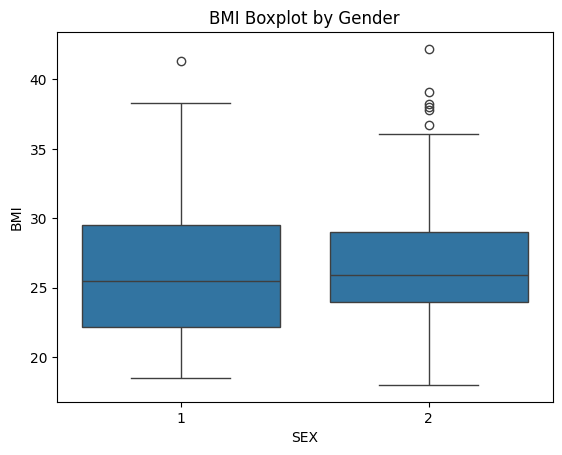

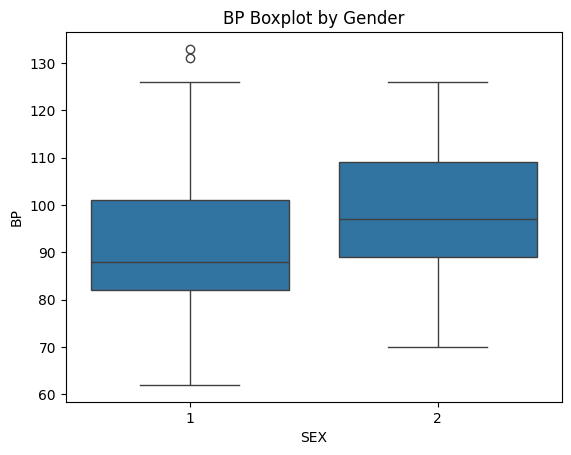

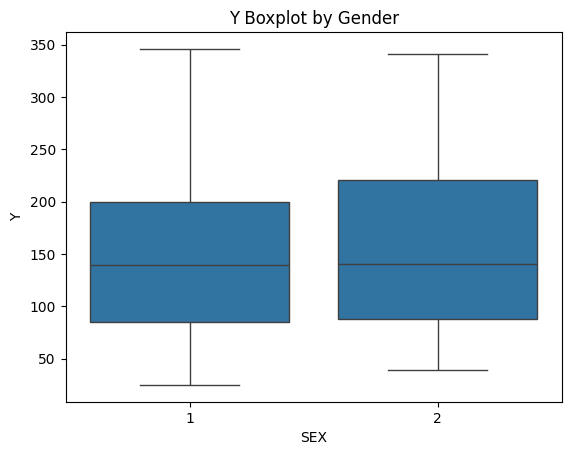

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Gender' is the column representing gender in your DataFrame
# Replace it with the actual column name if different
sns.boxplot(x='SEX', y='BMI', data=df)
plt.title('BMI Boxplot by Gender')
plt.show()

sns.boxplot(x='SEX', y='BP', data=df)
plt.title('BP Boxplot by Gender')
plt.show()

sns.boxplot(x='SEX', y='Y', data=df)
plt.title('Y Boxplot by Gender')
plt.show()


### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

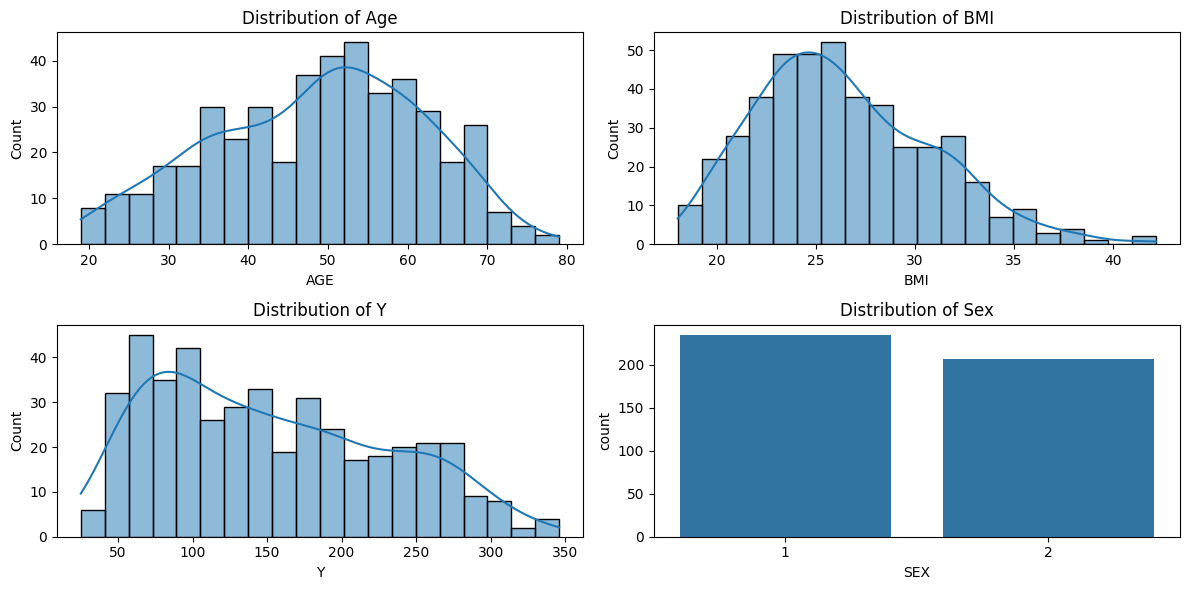

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with desired size
plt.figure(figsize=(12, 6))

# Plot histograms for numerical variables (Age, BMI, Y)
plt.subplot(2, 2, 1)
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')

plt.subplot(2, 2, 3)
sns.histplot(df['Y'], bins=20, kde=True)
plt.title('Distribution of Y')

# Plot count plot for categorical variable (Sex)
plt.subplot(2, 2, 4)
sns.countplot(x='SEX', data=df)
plt.title('Distribution of Sex')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [15]:
# Calculate Pearson correlation coefficients between all variables and 'Y'
correlation_matrix = df.corr()
correlation_with_y = correlation_matrix['Y'].drop('Y')  # Drop 'Y' column as it will be correlated with itself (correlation = 1)

# Print correlation coefficients
print("Correlation with Y:")
print(correlation_with_y)


Correlation with Y:
AGE    0.187889
SEX    0.043062
BMI    0.586450
BP     0.441482
S1     0.212022
S2     0.174054
S3    -0.394789
S4     0.430453
S5     0.565883
S6     0.382483
Name: Y, dtype: float64


In [16]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu


### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [17]:
# Assuming 'Sex' is the column representing gender in your DataFrame
# Replace it with the actual column name if different
diabetes_progression_male = df[df['SEX'] == 2]['Y']
diabetes_progression_female = df[df['SEX'] == 1]['Y']


In [18]:
t_statistic, p_value = ttest_ind(diabetes_progression_male, diabetes_progression_female)

print("Independent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The difference in diabetes progression between men and women is statistically significant.")
else:
    print("There is no statistically significant difference in diabetes progression between men and women.")


Independent Samples t-test:
t-statistic: 0.9041147550244715
p-value: 0.3664292946519826
There is no statistically significant difference in diabetes progression between men and women.


In [19]:
u_statistic, p_value = mannwhitneyu(diabetes_progression_male, diabetes_progression_female)

print("\nMann-Whitney U test:")
print("U-statistic:", u_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The difference in diabetes progression between men and women is statistically significant.")
else:
    print("There is no statistically significant difference in diabetes progression between men and women.")



Mann-Whitney U test:
U-statistic: 25375.0
p-value: 0.432427773770497
There is no statistically significant difference in diabetes progression between men and women.
